In [1]:
import numpy as np
from PIL import Image
from src import Index, Dataset, Model, roc
from monai.transforms import Lambdad, ToTensord, \
    RandAdjustContrastd,RandGaussianNoised, ScaleIntensityd, \
    RandRotate90d, RandFlipd, Compose

index = Index()

train_set = index.get(center='isala', level=4, overlapping=False, primary=False)
test_set = index.get(center='mst', level=4, overlapping=False, primary=False)

train_transform=Compose([
        Lambdad(['image'], lambda x: np.array(Image.open(x)).transpose(2,0,1).astype(np.float32)),   
        ScaleIntensityd(['image']),
        RandRotate90d(['image'], prob=0.75),
        RandFlipd(['image'], prob=0.5, spatial_axis=0),
        RandFlipd(['image'], prob=0.5, spatial_axis=1),
        ToTensord(keys=['image']),
        RandAdjustContrastd(['image'], prob=0.5, gamma=(0.5,2)),
    ])

ds = Dataset(dev_set=train_set, test_set=test_set, train_transform=train_transform)
ds.setup()

Global seed set to 5
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | DenseNet | 7.0 M 
-----------------------------------
1.0 K     Trainable params
7.0 M     Non-trainable params
7.0 M     Total params
27.820    Total estimated model params size (MB)


Epoch 1:   0%|          | 0/177 [00:00<00:00, 858.96it/s, loss=0.67, v_num=9]  

Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.


Epoch 9: 100%|██████████| 177/177 [00:12<00:00, 14.13it/s, loss=0.585, v_num=9] 

DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing: 100%|██████████| 119/119 [00:08<00:00, 15.58it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 119/119 [00:08<00:00, 13.44it/s]


Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


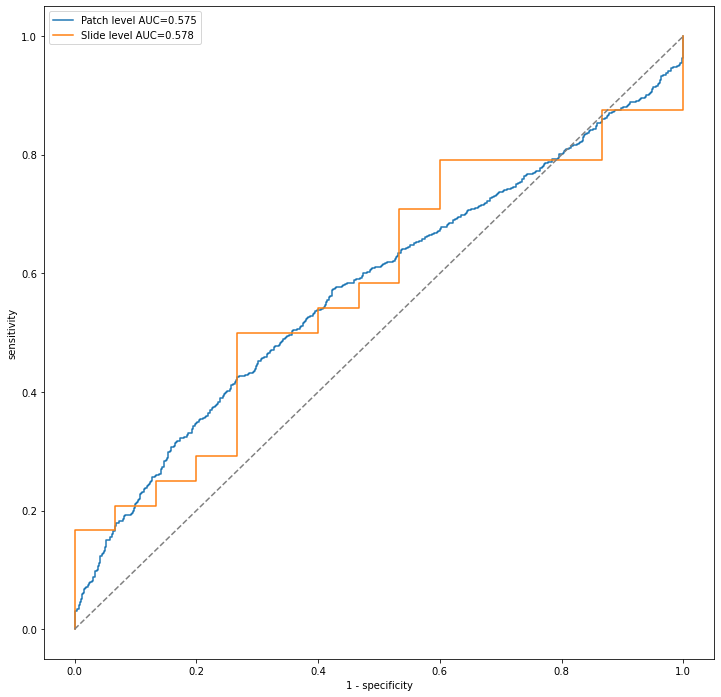

In [2]:
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import TensorBoardLogger

seed_everything(5)

model = Model()
logger = TensorBoardLogger('tb_logs', name='08_preserve_sanity')

trainer = Trainer(
    gpus=1,
    max_epochs=10,
    logger=logger,
    fast_dev_run=False,
    num_sanity_val_steps=0,
    # callbacks=[lr_monitor],
)

trainer.fit(model, ds)
trainer.test(model, ds)

roc(model.results)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 100%|██████████| 109/109 [00:08<00:00, 16.27it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 109/109 [00:08<00:00, 13.42it/s]


Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


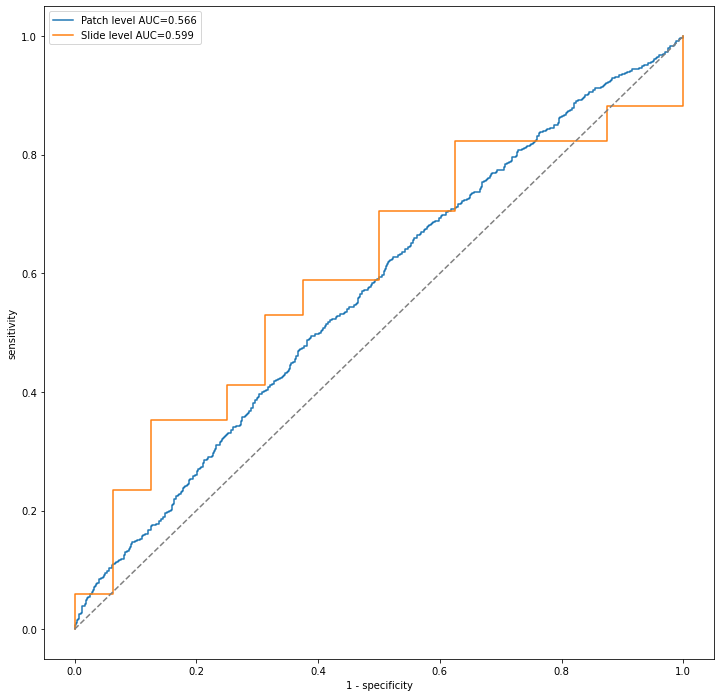

In [3]:
test_set = index.get(center='radboud', level=4, overlapping=False, primary=False)
tds = Dataset(test_set=test_set)

model.reset_results()
trainer.test(model, tds)

roc(model.results)

Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | DenseNet | 7.0 M 
-----------------------------------
1.0 K     Trainable params
7.0 M     Non-trainable params
7.0 M     Total params
27.820    Total estimated model params size (MB)


Epoch 9: 100%|██████████| 124/124 [00:09<00:00, 12.76it/s, loss=0.546, v_num=27] 

DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing:  98%|█████████▊| 53/54 [00:04<00:00, 14.85it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 54/54 [00:04<00:00, 11.77it/s]


Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


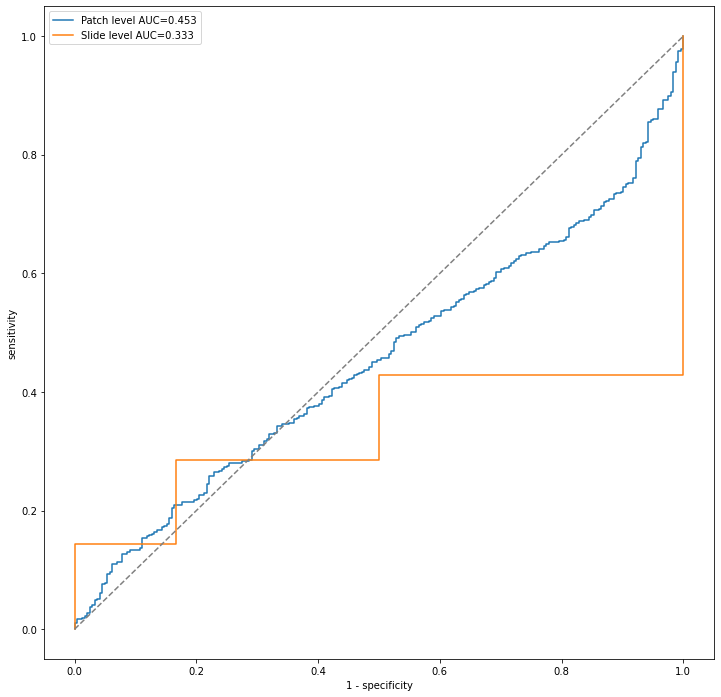

In [38]:
import random

seed_everything(2)

full_set = index.get(center='isala', level=4, overlapping=False, primary=False)

patients = full_set.patient.unique()
random.shuffle(patients)
train_patients = patients[:40]
test_patients = patients[40:]

dev_set = full_set[full_set.patient.isin(train_patients)]
test_set = full_set[full_set.patient.isin(test_patients)]

ds = Dataset(dev_set=dev_set, test_set=test_set, train_transform=train_transform)
ds.setup()

model=Model()

trainer = Trainer(
    gpus=1,
    max_epochs=10,
    logger=logger,
    fast_dev_run=False,
    num_sanity_val_steps=0,
    # callbacks=[lr_monitor],
)


trainer.fit(model, ds)
trainer.test(model, ds)

roc(model.results)

In [165]:
from src import Model

import pytorch_lightning as pl
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import random
from torchvision.models import densenet121
from pathlib import Path
from torchvision import datasets, transforms
from monai.data import CacheDataset, DataLoader
from monai.transforms import Lambdad, ToTensord, \
    RandAdjustContrastd,RandGaussianNoised, ScaleIntensityd, \
    RandRotate90d, RandFlipd, Compose
from PIL import Image
from torchmetrics import AUROC
from pytorch_lightning.callbacks import LearningRateMonitor
from pl_bolts.optimizers.lr_scheduler import LinearWarmupCosineAnnealingLR


class BenefitDataset(pl.LightningDataModule):
    def __init__(self, data_path, train_patients, val_patients, test_patients):
        super().__init__()

        self.train_patients = train_patients
        self.val_patients = val_patients
        self.test_patients = test_patients

        self.data_path = data_path
        self.train_transform=Compose([
            Lambdad(['image'], lambda x: np.array(Image.open(x)).transpose(2,0,1).astype(np.float32)),   
            ScaleIntensityd(['image']),
            RandRotate90d(['image'], prob=0.75),
            RandFlipd(['image'], prob=0.5, spatial_axis=0),
            RandFlipd(['image'], prob=0.5, spatial_axis=1),
            ToTensord(keys=['image']),
            RandAdjustContrastd(['image'], prob=0.5, gamma=(0.5,2)),
        ])
        self.test_transform=Compose([
            Lambdad(['image'], lambda x: np.array(Image.open(x)).transpose(2,0,1).astype(np.float32)),
            ScaleIntensityd(['image']),
            ToTensord(keys=['image']),
            
        ])

    def setup(self, stage=None):
        print('call me baby')
        paths = list(self.data_path.iterdir())

        dmtr = pd.read_csv('/home/rens/repos/PREMIUM/code/radiomics_paper/dmtr.csv').set_index('id')

        df = pd.DataFrame(
            [
                [str(p) for p in paths],
                [p.stem.split('_')[0].replace('-','_') for p in paths],
            ],
            index=['path','patient']
        ).transpose()

        dcb = []
        for patient in df.patient:
            try:
                dcb.append(dmtr.loc[patient, 'dcb'])
            except:
                dcb.append(float('nan'))
        df['dcb'] = dcb

        df = df[~df.dcb.isna()]
        df['dcb'] = df['dcb'].astype(int)

        patients = df.patient.unique()
        random.shuffle(patients)
        n = len(patients)
        train_n = int(n * 0.6)
        val_n = int(n * 0.2)

        self.train_patients = patients[:train_n]
        self.val_patients = patients[train_n:train_n+val_n]
        self.test_patients = patients[-val_n:]

        # if stage == 'fit' or stage is None:
        self.train_input = self.df_to_input(df[df.patient.isin(self.train_patients)])
        self.val_input = self.df_to_input(df[df.patient.isin(self.val_patients)])
        # if stage == 'test' or stage is None:
        self.test_input = self.df_to_input(df[df.patient.isin(self.test_patients)])
    
    def make_dataloader(self, input, transform, shuffle=False):
        ds = CacheDataset(input, transform=transform, cache_rate=0)
        dl = DataLoader(ds, batch_size=16, shuffle=shuffle, num_workers=12)
        
        return dl

    def train_dataloader(self):
        return self.make_dataloader(self.train_input, self.train_transform, shuffle=False)

    def val_dataloader(self):
        return self.make_dataloader(self.val_input, self.test_transform,)

    def test_dataloader(self):
        return self.make_dataloader(self.test_input, self.test_transform,)

    def df_to_input(self, df):
            return [
                {'path':r['path'], 
                'image':r['path'],
                'label':r['dcb']}
                for _, r in df.iterrows()
            ]

Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


call me baby


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | DenseNet | 7.0 M 
-----------------------------------
1.0 K     Trainable params
7.0 M     Non-trainable params
7.0 M     Total params
27.820    Total estimated model params size (MB)


Epoch 1:   0%|          | 0/134 [00:00<00:00, 946.15it/s, loss=0.646, v_num=40]  

Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.


Epoch 9: 100%|██████████| 134/134 [00:10<00:00, 13.28it/s, loss=0.539, v_num=40] 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing:  97%|█████████▋| 31/32 [00:02<00:00, 15.31it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 32/32 [00:03<00:00, 10.55it/s]


Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


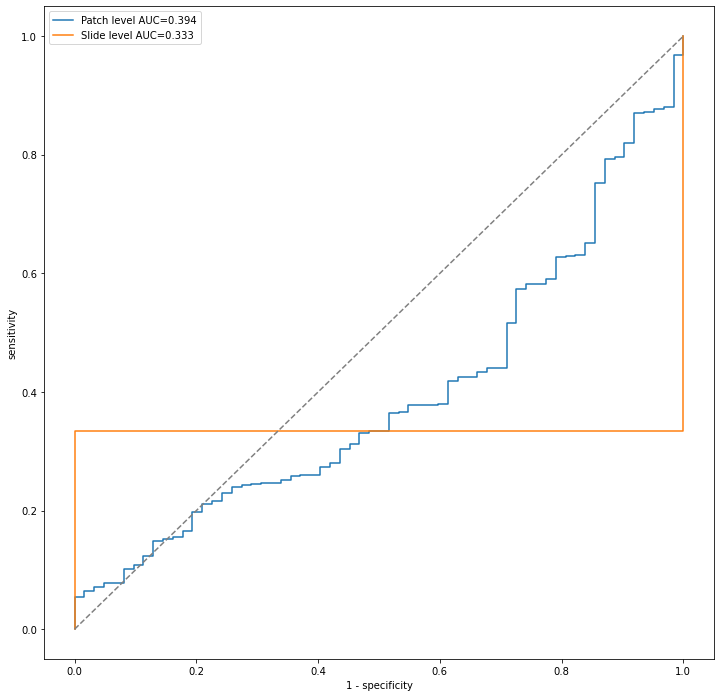

In [166]:
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import LearningRateMonitor

seed_everything(2)

ds = BenefitDataset(Path('/home/rens/hpc/rens/output/patches/isala_metastasis_level4'),
    trp,
    vp,
    tsp
)
model = Model()
logger = TensorBoardLogger('tb_logs', name='07_benefit')
lr_monitor = LearningRateMonitor(logging_interval='step')

trainer = Trainer(
    gpus=1,
    max_epochs=10,
    logger=logger,
    fast_dev_run=False,
    num_sanity_val_steps=0,
    # callbacks=[lr_monitor],
)

ds.setup()

trainer.fit(model, ds.train_dataloader(), ds.val_dataloader())
trainer.test(model, ds.test_dataloader())
roc(model.results)

In [155]:
np.unique([x['path'].split('/')[-1].split('_')[0] for x in ds.train_input])

array(['PREM-IS-005', 'PREM-IS-012', 'PREM-IS-016', 'PREM-IS-017',
       'PREM-IS-039', 'PREM-IS-042', 'PREM-IS-045', 'PREM-IS-051',
       'PREM-IS-061', 'PREM-IS-067', 'PREM-IS-068', 'PREM-IS-069',
       'PREM-IS-075', 'PREM-IS-081', 'PREM-IS-084', 'PREM-IS-087',
       'PREM-IS-093', 'PREM-IS-094', 'PREM-IS-096', 'PREM-IS-097',
       'PREM-IS-099', 'PREM-IS-102', 'PREM-IS-109', 'PREM-IS-110',
       'PREM-IS-126', 'PREM-IS-131', 'PREM-IS-136', 'PREM-IS-137',
       'PREM-IS-139', 'PREM-IS-141', 'PREM-IS-142'], dtype='<U11')

In [156]:
np.unique([x['path'].split('/')[-1].split('_')[0] for x in ds.test_input])

array(['PREM-IS-009', 'PREM-IS-034', 'PREM-IS-037', 'PREM-IS-040',
       'PREM-IS-055', 'PREM-IS-064', 'PREM-IS-095', 'PREM-IS-101',
       'PREM-IS-124', 'PREM-IS-140'], dtype='<U11')

In [144]:
data_path = Path('/home/rens/hpc/rens/output/patches/isala_metastasis_level4')

paths = list(data_path.iterdir())

dmtr = pd.read_csv('/home/rens/repos/PREMIUM/code/radiomics_paper/dmtr.csv').set_index('id')

df = pd.DataFrame(
    [
        [str(p) for p in paths],
        [p.stem.split('_')[0].replace('-','_') for p in paths],
    ],
    index=['path','patient']
).transpose()

dcb = []
for patient in df.patient:
    try:
        dcb.append(dmtr.loc[patient, 'dcb'])
    except:
        dcb.append(float('nan'))
df['dcb'] = dcb

df = df[~df.dcb.isna()]
df['dcb'] = df['dcb'].astype(int)

patients = df.patient.unique()
random.shuffle(patients)
n = len(patients)
train_n = int(n * 0.6)
val_n = int(n * 0.2)

train_patients = patients[:train_n]
val_patients = patients[train_n:train_n+val_n]
test_patients = patients[-val_n:]

def df_to_input(df):
    return [
        {'path':r['path'], 
        'image':r['path'],
        'label':r['dcb']}
        for _, r in df.iterrows()
    ]


train_input = df_to_input(df[df.patient.isin(train_patients)])
val_input = df_to_input(df[df.patient.isin(val_patients)])

test_input = df_to_input(df[df.patient.isin(test_patients)])

Columns (2,24,26,111,115,200,204,361,363,375,416,422,451,470,477,480,521,524,547,585,591,654,667,733,757,765,767,768,769,770,771,773,774,775,776,777,779,780,781,782,833,836,844,847,848,854,857,858,860,861,862,864,865,867,868,869,876,877,879,880,881,882,883,885,886,887,888,889,891,892,893,894,895,897,898,899,912,913,915,916,917,918,919,921,922,923,924,925,927,928,929,930,931,933,934,935) have mixed types.Specify dtype option on import or set low_memory=False.


In [147]:
np.unique([x['path'].split('/')[-1].split('_')[0] for x in train_input])

array(['PREM-IS-009', 'PREM-IS-018', 'PREM-IS-021', 'PREM-IS-025',
       'PREM-IS-034', 'PREM-IS-037', 'PREM-IS-039', 'PREM-IS-040',
       'PREM-IS-045', 'PREM-IS-053', 'PREM-IS-064', 'PREM-IS-067',
       'PREM-IS-068', 'PREM-IS-081', 'PREM-IS-084', 'PREM-IS-087',
       'PREM-IS-094', 'PREM-IS-095', 'PREM-IS-097', 'PREM-IS-101',
       'PREM-IS-104', 'PREM-IS-109', 'PREM-IS-126', 'PREM-IS-131',
       'PREM-IS-132', 'PREM-IS-136', 'PREM-IS-137', 'PREM-IS-139',
       'PREM-IS-140', 'PREM-IS-141', 'PREM-IS-142'], dtype='<U11')

In [149]:
np.unique(train_patients)

array(['PREM_IS_009', 'PREM_IS_018', 'PREM_IS_021', 'PREM_IS_025',
       'PREM_IS_034', 'PREM_IS_037', 'PREM_IS_039', 'PREM_IS_040',
       'PREM_IS_045', 'PREM_IS_053', 'PREM_IS_064', 'PREM_IS_067',
       'PREM_IS_068', 'PREM_IS_081', 'PREM_IS_084', 'PREM_IS_087',
       'PREM_IS_094', 'PREM_IS_095', 'PREM_IS_097', 'PREM_IS_101',
       'PREM_IS_104', 'PREM_IS_109', 'PREM_IS_126', 'PREM_IS_131',
       'PREM_IS_132', 'PREM_IS_136', 'PREM_IS_137', 'PREM_IS_139',
       'PREM_IS_140', 'PREM_IS_141', 'PREM_IS_142'], dtype=object)

In [151]:
np.unique(test_patients)

array(['PREM_IS_005', 'PREM_IS_012', 'PREM_IS_017', 'PREM_IS_028',
       'PREM_IS_038', 'PREM_IS_061', 'PREM_IS_075', 'PREM_IS_099',
       'PREM_IS_102', 'PREM_IS_110'], dtype=object)

In [152]:
np.unique([x['path'].split('/')[-1].split('_')[0] for x in test_input])

array(['PREM-IS-005', 'PREM-IS-012', 'PREM-IS-017', 'PREM-IS-028',
       'PREM-IS-038', 'PREM-IS-061', 'PREM-IS-075', 'PREM-IS-099',
       'PREM-IS-102', 'PREM-IS-110'], dtype='<U11')